In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import os

import librosa
import librosa.display

import seaborn as sns

In [2]:
ds_path = '/home/edoardobucheli/Datasets/FSDKaggle2018/'

In [3]:
train_data = pd.read_csv(os.path.join(ds_path,'train_post_competition.csv'))
test_data = pd.read_csv(os.path.join(ds_path,'test_post_competition_scoring_clips.csv'))

# Train Data

In [4]:
train_data.head()

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution


### General Properties

In [5]:
print('Num of training examples: {}'.format(len(train_data)))

classes = np.unique(train_data['label'].tolist())
print('Num of Classes: {}'.format(len(classes)))

is_manually_verified = train_data['manually_verified'] == 1
print('Manually Verified Examples: {}'.format(np.sum(is_manually_verified)))
is_not_manually_verified = train_data['manually_verified'] == 0
print('Not Manually Verified Examples: {}'.format(np.sum(is_not_manually_verified)))

Num of training examples: 9473
Num of Classes: 41
Manually Verified Examples: 3710
Not Manually Verified Examples: 5763


### Manual vs Automatic Labels

In [6]:
manual_train = train_data[is_manually_verified]
automatic_train = train_data[is_not_manually_verified]

In [7]:
classes_overall, counts_overall = np.unique(train_data['label'].tolist(), return_counts=True)
classes_manual, counts_manual = np.unique(manual_train['label'].tolist(), return_counts=True)
classes_auto, counts_auto = np.unique(automatic_train['label'].tolist(), return_counts=True)

In [8]:
print('Overall:')

print('\tAverage per class: {:0.2f}'.format(np.mean(counts_overall)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_overall)))
print('\tMedian: {:0.0f}'.format(np.median(counts_overall)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_overall)], np.max(counts_overall)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_overall)], np.min(counts_overall)))

print('\nManual:')

print('\tAverage per class: {:0.2f}'.format(np.mean(counts_manual)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_manual)))
print('\tMedian: {:0.0f}'.format(np.median(counts_manual)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_manual)], np.max(counts_manual)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_manual)], np.min(counts_manual)))

print('\nAutomatic:')

print('\tAverage por class: {:0.2f}'.format(np.mean(counts_auto)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_auto)))
print('\tMedian: {:0.0f}'.format(np.median(counts_auto)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_auto)], np.max(counts_auto)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_auto)], np.min(counts_auto)))

Overall:
	Average per class: 231.05
	Standard Deviation: 77.84
	Median: 279
	Class with Most Instances: Acoustic_guitar = 300
	Class with Least Instances: Glockenspiel = 94

Manual:
	Average per class: 90.49
	Standard Deviation: 42.33
	Median: 75
	Class with Most Instances: Saxophone = 256
	Class with Least Instances: Bus = 59

Automatic:
	Average por class: 140.56
	Standard Deviation: 77.48
	Median: 172
	Class with Most Instances: Applause = 239
	Class with Least Instances: Gunshot_or_gunfire = 2


### Class Distribution

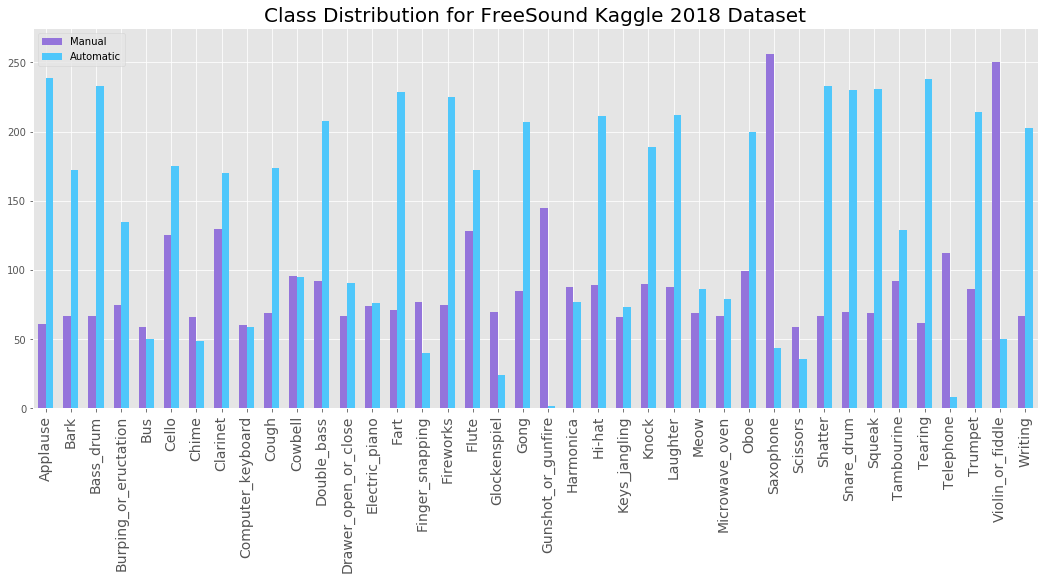

In [9]:
x = np.arange(41)
width = 0.3

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x-0.5*width,counts_manual, width, label = 'Manual', color ='#9474DB', zorder = 2)
rects2 = ax.bar(x+0.5*width,counts_auto, width, label = 'Automatic', color ='#4FC7FB',zorder = 2)


ax.set_title('Class Distribution for FreeSound Kaggle 2018 Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
fig = ax.legend(loc = 'upper left')
fig = ax.set(xlim = [0.5,40.5], ylim = [0,275])

plt.savefig('./FSDKagle2018_classdistribution.eps')

### Clip Properties

In [10]:
from scipy.io.wavfile import read as wavread
from tqdm import tqdm_notebook
from IPython.display import Audio

In [11]:
train_files = train_data['fname'].tolist()

In [12]:
train_wavs = []
train_lengths = []

for i, file in enumerate(tqdm_notebook(train_files)):
    sr, this_wav = wavread(os.path.join(ds_path,'audio_train', file))
    
    train_wavs.append(this_wav)
    train_lengths.append(len(this_wav))

In [19]:
train_lengths_s = np.array(train_lengths)/sr
print('Average: {:0.2f}'.format(np.mean(train_lengths_s)))
print('Std: {:0.2f}'.format(np.std(train_lengths_s)))
print('Median: {:0.2f}'.format(np.median(train_lengths_s)))

Average: 6.79
Std: 7.04
Median: 4.06


In [13]:
print('Shortest Example [samples]: {}'.format(np.min(train_lengths)))
print('Shortest Example [seconds]: {}'.format(np.min(train_lengths)/sr))

Shortest Example [samples]: 13230
Shortest Example [seconds]: 0.3


In [20]:
print('Longest Example [samples]: {}'.format(np.max(train_lengths)))
print('Longest Example [seconds]: {}'.format(np.max(train_lengths)/sr))

Longest Example [samples]: 1323000
Longest Example [seconds]: 30.0


In [81]:
train_data['File Length [samples]'] = train_lengths
train_data['File Length [s]'] = np.array(train_lengths)/sr

In [82]:
train_data.head()

,fname,label,manually_verified,freesound_id,license,File Length [samples],File Length [s]
0,00044347.wav,Hi-hat,0,28739,Attribution,617400,14.00
1,001ca53d.wav,Saxophone,1,358827,Attribution,455112,10.32
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0,19404,0.44
3,0033e230.wav,Glockenspiel,1,325017,Attribution,352800,8.00
4,00353774.wav,Cello,1,195688,Attribution,199332,4.52


/home/edoardobucheli/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


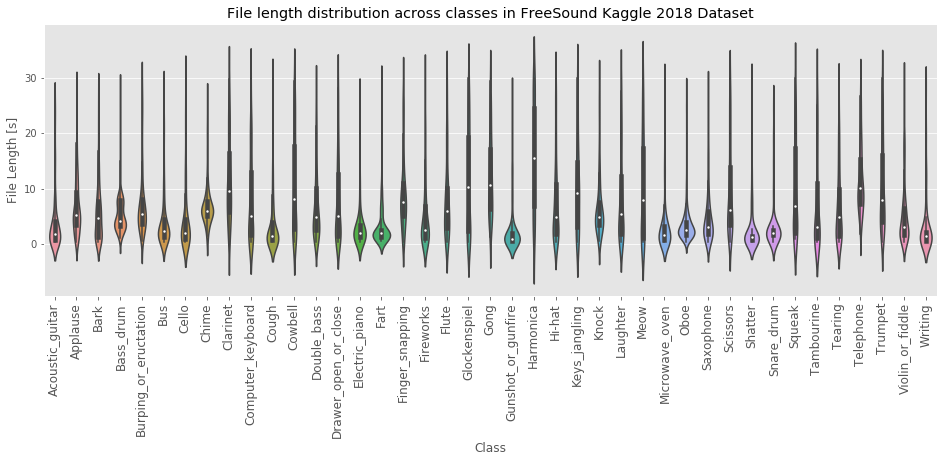

In [97]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.violinplot(x="label", y="File Length [s]", data=train_data)
fig = ax.set_title('File length distribution across classes in FreeSound Kaggle 2018 Dataset')
fig = ax.set_xticks(np.arange(41))
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 12)
fig = ax.set_xlabel('Class')
plt.savefig('./ViolinFSDK2018.eps')